In [2]:
from statistics import mode
from docx import *
import re
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import spacy

In [8]:
docs_path = ['../data/raw/pdf/7kLHJ-F33GI/lect11.docx',
             '../data/raw/pdf/7kLHJ-F33GI/o-mle.docx',
             '../data/raw/pdf/7kLHJ-F33GI/MIT18_05S14_Reading10b.docx',
             '../data/raw/pdf/7kLHJ-F33GI/mle_introduction.docx']

In [5]:
p_sent = re.compile('\w+')
p_letter = re.compile('[a-zA-Z]')

In [18]:
def read_doc(doc_path):
    word_document = Document(doc_path)
    full_text = []
    font_sizes = []
    for para in word_document.paragraphs:
        for i,run in enumerate(para.runs):        
            matching = p_sent.match(run.text)

            # see if there is a number or letter ( it is not a trash)
            if matching is not None:
                    full_text.append(run.text)
                    font_sizes.append(run.font.size)
    return {'full_text':full_text,'font_sizes':font_sizes}

In [33]:
#word_documents = [read_doc(dp) for dp in docs_path ]
word_documents = []
for dp in docs_path:
    docx_id = dp.split('/')[-1]
    tmp = read_doc(dp)
    tmp['id_'] = docx_id
    word_documents.append(tmp)

In [34]:
word_documents[1]['full_text']

['Topic 15: Maximum Likelihood Estimation',
 'November 1 and 3, 2011',
 'Introduction',
 'The principle of maximum likelihood is relatively straightforward. As before, we begin with a sample X = (X',
 '1',
 'n',
 '1',
 'n',
 'Then, the principle of maximum likelihood yields a choice of the estimator as the value for the parameter that makes the observed data most probable.',
 'We will learn that especially for large samples, the maximum likelihood estimators have many desirable properties. However, especially for high dimensional data, the likelihood can have many local maxima. Thus, finding the global maximum can be a major computational challenge.',
 'This class of estimators has an important property. If',
 'is a maximum likelihood estimate for g( ). For example, if\tis a parameter for the variance and',
 'is the maximum',
 'p',
 'likelihood estimator, then is the maximum likelihood estimator for the standard deviation. This flexibility in estimation criterion seen here is not avail

In [35]:
def find_chapters(params):
    full_text = params['full_text']
    font_sizes = params['font_sizes']
    most_common_font_size = mode(font_sizes)
    topic_titles = []
    key_word_='Topic'
    p_Start_Section = re.compile(' ') #re.compile('{} \d?'.format(key_word_))
    p_subsection_numbering = re.compile(r'^((\d+\.)+\d*)$')
    p_words = re.compile('[A-Za-z]+')
    total_corpus = []
    chapter_corpus = ""

    for i,(doc_size,doc_text) in enumerate(zip(font_sizes,full_text)):
        ''' if it is a header '''
        if(doc_size > most_common_font_size):
            is_title = False
            print(doc_text)
        

In [38]:
find_chapters(word_documents[1])

Topic 15: Maximum Likelihood Estimation
November 1 and 3, 2011
Introduction
1
n
1
n
Examples
r
k  r
6
12
r
i
i
i
i
2
i
i
i
2
i
i
2 
i
i
i
i
i
i
2
2
2
i
w
w
i
w
w
1
n
i
i
i
1
i  n
i
n
E X
1
i  n
i
X
i
1
2
n
1
2
n
d(X) =
n
X
Summary of Estimates
Asymptotic Properties
0
n
n
0
0
1
Var
n
nI
0
0
n
2
Multidimensional Estimation
1
2
n
1
i;n
i
Z
i;n
I( )
ii
p
n
ln
Choice of Estimators
m
m
X
Technical Aspects
0
1
0
E
ln
f(X
1
j
0
0
0
i
0
0
0
2
i
0
2
0
0
0
0
2
0
n
0
Answers to Selected Exercises
p(1
p
i
i
alpha


In [9]:
topic_titles

['Displaying Data',
 '1.1 Types of Data',
 '1.2 Categorical Data',
 '1.2.1 Pie Chart',
 '1.2.2 Bar Charts',
 '1.3 Two-way Tables',
 '1.4 Histograms and the Empirical Cumulative Distribution Function',
 '1.5 Scatterplots',
 '1.6 Time Plots',
 '1.7 Answers to Selected Exercises',
 'Describing Distributions with Numbers',
 '2.1 Measuring Center',
 '2.1.1 Medians',
 '2.1.2 Means',
 '2.2 Measuring Spread',
 '2.2.1 Five Number Summary',
 '2.2.2 Sample Variance and Standard Deviation',
 '2.3 Quantiles and Standardized Variables',
 '2.4 Quantile-Quantile Plots',
 '2.5 Answers to Selected Exercises',
 'Correlation and Regression',
 '3.1 Covariance and Correlation',
 '3.2 Linear Regression',
 '3.2.1 Transformed Variables',
 '3.3 Extensions',
 '3.3.1 Nonlinear Regression',
 '3.3.2 Multiple Linear Regression',
 '3.4 Answers to Selected Exercises',
 'Producing Data',
 '4.1 Preliminary Steps',
 '4.2 Professional Ethics',
 '4.3 Formal Statistical Procedures',
 '4.3.1 Observational Studies',
 '4.3.2 R

In [10]:
total_corpus[2]

'A data set provides information about a group of individuals. These individuals are, typically, representatives chosen from a population under study. Data on the individuals are meant, either informally or formally, to allow us to make inferences about the population. We shall later discuss how to define a population, how to choose individuals in the population and how to collect data on these individuals. Individuals are the objects described by the data. Variables are characteristics of an individual. In order to present data, we must first recognize the types of data under consideration. Example 1.1 (individuals and variables). We consider two populations - the first is the nations of the world and the second is the people who live in those countries. Below is a collection of variables that might be used to study these populations. 3 Exercise 1.2. Classify the variables as quantitative or categorical in the example above. The naming of variables and their classification as categori

In [11]:
print(len(total_corpus))
print(len(topic_titles))

178
178


In [12]:
stop_words = stopwords.words('english')
nlp = spacy.load('en',disable=['parser','ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB']

In [13]:
total_corpus[2]

'A data set provides information about a group of individuals. These individuals are, typically, representatives chosen from a population under study. Data on the individuals are meant, either informally or formally, to allow us to make inferences about the population. We shall later discuss how to define a population, how to choose individuals in the population and how to collect data on these individuals. Individuals are the objects described by the data. Variables are characteristics of an individual. In order to present data, we must first recognize the types of data under consideration. Example 1.1 (individuals and variables). We consider two populations - the first is the nations of the world and the second is the people who live in those countries. Below is a collection of variables that might be used to study these populations. 3 Exercise 1.2. Classify the variables as quantitative or categorical in the example above. The naming of variables and their classification as categori

In [14]:
total_corpus_tokenized =[]
#p_end_sentence = re.compile('[a-zA-Z]\.')
start_index = 0
for chapter_corpus in total_corpus:
    documents = []
    for m in re.finditer('[a-zA-Z]\.',chapter_corpus):
        chapter_tokenized_doc = chapter_corpus[start_index:m.start(0) + 1]
        doc_text_no_punc = simple_preprocess(chapter_tokenized_doc,deacc=True) 
        tokenized_text_non_stop_words = [ word for word in doc_text_no_punc \
                                         if word not in stop_words]
        text_non_stop_words = ' '.join(tokenized_text_non_stop_words)
        tokenized_lemmas = nlp(text_non_stop_words)
        tokenized_lemmas = [token.lemma_ for token in tokenized_lemmas \
                            if token.pos_ in allowed_postags]
        documents.append(tokenized_lemmas)
        start_index = m.end(0) + 1
    total_corpus_tokenized.append(documents)
#    print(documents)
#    break

In [15]:
total_corpus_tokenized = [ [doc for doc in ch if len(doc) >0 ] for ch in total_corpus_tokenized]

In [16]:
total_corpus_tokenized[0]

[['introduction',
  'science',
  'statistic',
  'statistical',
  'think',
  'day',
  'necessary',
  'qualification',
  'efficient',
  'citizenship',
  'ability',
  'read'],
 ['wilke', 'paraphrasing'],
 ['mankind',
  'make',
  'value',
  'statistical',
  'thinking',
  'accept',
  'researcher',
  'practitioner',
  'broad',
  'range',
  'endeavor'],
 ['viewpoint', 'become', 'common', 'wisdom', 'world', 'big', 'datum'],
 ['educator',
  'adapt',
  'pedagogy',
  'accommodate',
  'circumstance',
  'associate',
  'information',
  'age'],
 ['choice',
  'pedagogy',
  'attune',
  'quantitative',
  'capability',
  'scientific',
  'background',
  'student',
  'intend',
  'use',
  'acquire',
  'knowledge',
  'statistic'],
 ['many',
  'university',
  'student',
  'presume',
  'proficient',
  'college',
  'algebra',
  'teach',
  'variety',
  'procedure',
  'standard',
  'test',
  'developed',
  'pedagogy'],
 ['approach',
  'refine',
  'student',
  'good',
  'intuitive',
  'understanding',
  'underlyin

In [17]:
import sys
sys.path.append('..')
from src.models.pipeline import pipeline
import glob
import json
import os
import pandas as pd
import ast
from datetime import datetime
from src.models.train_model import functionsBuilder
from src.models.audio import downloadAudioFromYoutube
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from src.data import pdf
from functools import reduce
import heapq
from gensim.corpora import Dictionary
from gensim import models
from src.visualization.visualize import MyPlotting
from gensim import similarities
import re
import statistics
import numpy as np

In [18]:
groundbase_dir = '../data/raw/groundbase'
transcripts_dir = os.path.join(groundbase_dir,'transcripts')
topic_dataset_path = os.path.join(groundbase_dir,'dataset.csv')
transcript_filespath = glob.glob(groundbase_dir + '/transcripts/*.json')

'''Read the transcript'''
transcripts_jsons = {}
for fl in transcript_filespath:
    with open(fl,encoding="utf8") as f:
        transcript =ast.literal_eval(f.read()) #json.load(f)
        vid = fl.split('\\')[-1].split('.')[0]
        #print(vid)
        transcripts_jsons[vid] = transcript
#print(transcripts_jsons)

'''Read the videos metadata to perform on them the segmentation'''
df_videos = pd.read_csv(topic_dataset_path)

''' Transfer topic shifts time to seconds units instead HH:MM:SS'''

def topic_shifts_seconds(topic_shifts):
    tp_shift_sec=[]
    for tp in topic_shifts:
        intervals = tp.split(':')
        seconds = int(intervals[2])
        minutes = int(intervals[1]) * 60
        hours = int(intervals[0]) * 60 *60
        tp_shift_sec.append(seconds + minutes + hours)
    return tp_shift_sec


for video_id in transcripts_jsons.keys():    
    df_videos.at[df_videos['video id'] == video_id,'topic shifts(ends)'] =\
    topic_shifts_seconds(\
                         df_videos[df_videos['video id'] == \
                                   video_id]['topic shifts(ends)'])
    
    
    
df_results = pd.read_csv('../data/processed/bayesian_opt/results.csv')
#best_results = df_results.groupby('video')[['video','workflow','params','max_target']].max().values.tolist()
n_largest_res = 1
'''This is the videos that have a pdf'''
#filtered_video = ['x5zLaWT5KPs','dkAr9ThdSUU','2mC1uqwEmWQ',
#                  'MkiUBJcgdUY','Q-HugPvA7GQ','tORLeHHtazM','zWg7U0OEAoE']

filtered_video = ['7kLHJ-F33GI','7snJ1mx1EMQ','RIawrYLVdIw']

best_results = df_results[df_results['video'].isin(filtered_video)].groupby('video')[['video','workflow','params','max_target']].apply(lambda grp: grp.nlargest(n_largest_res,'max_target')).values.tolist()


In [19]:
filtered_video = [bs[0] for bs in  best_results]
best_results

[['7kLHJ-F33GI',
  'sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering',
  "{'n_clusters': 18.0, 'sim_thresh': 0.6, 'step_size': 10.0, 'window_size': 150.0}",
  0.8181818181818182],
 ['7snJ1mx1EMQ',
  'sliding_window-tfidf-cosine-median_(2,2)-spectral_clustering',
  "{'n_clusters': 16.432431412456257, 'sim_thresh': 0.3000063890009115, 'step_size': 59.99514192872911, 'window_size': 21.1099397077962}",
  0.8571428571428571],
 ['RIawrYLVdIw',
  'sliding_window-tfidf-cosine-None-spectral_clustering',
  "{'n_clusters': 14.786160659898577, 'sim_thresh': 0.5924873369457966, 'step_size': 10.073958555862824, 'window_size': 60.422260605496106}",
  0.625]]

In [20]:
vid_words= []
vids_shift_times = []
vids_id = []
#best_results = best_results[1:]
for vid_results in best_results: #range(0,len(best_results),n_largest_res):
    '''From the get optimized by bayesian we get that for the video '''
    # the precision is about 66% 
    vid = vid_results[0]
    params = ast.literal_eval(vid_results[2]) #{'n_clusters': 18, 'sim_thresh': 0.6, 'step_size': 49, 'window_size': 150}
    #print(params)
    for key in ['n_clusters','step_size','window_size']:
        params[key] = int(params[key])# - 1
    workflow = vid_results[1] #'sliding_window-tfidf-cosine-median_(3,3)-spectral_clustering'

    groundbase = df_videos.loc[df_videos['video id'] == vid,'topic shifts(ends)'].values.tolist()[:-1]
    transcripts = transcripts_jsons[vid]
    #print(grounbase)
    _pipeline = workflow.split('-')
    filter_type = None
    mask_shape = None
    filtering = _pipeline[3]
    if filtering != 'None':
        filter_type = filtering.split('_')[0]
        mask_shape = ast.literal_eval(filtering.split('_')[1])
    '''This running may not work at first time do not give up and run it couple of times'''

    '''print('Running the following %s for video %s with params %s %s %s'
          %(workflow, vid,params,filter_type,mask_shape))'''
    shift_times,topic_words = (None,None)
    while shift_times is None and topic_words is None:
        shift_times,topic_words = pipeline.run_for_baye(groundbase,transcripts,slicing_method='sliding_window',
                              window_size=params['window_size'],step_size_sd=params['step_size'],
                              #silence_threshold=-30,slice_length=1000,step_size_audio=10,wav_file_path="../../data/raw/audio/Mod-01 Lec-01 Foundation of Scientific Computing-01.wav",                
                              vector_method='tfidf',vectorizing_params=None,
                              similarity_method='cosine',
                              filter_params={"filter_type":filter_type,
                                             "mask_shape":mask_shape,
                                             "sim_thresh":params['sim_thresh'],
                                             "is_min_thresh":True
                                             },
                             clustering_params={
                                     'algorithm':'spectral_clustering',
                                     'n_clusters':params['n_clusters']
                                     },return_value='division') or (None,None)
    print("For video %s, %s where found" %(vid,len(shift_times)))
    vid_words.append(topic_words)
    shift_times.append('end')
    vids_shift_times.append(shift_times)
    vids_id.append(vid)

For video 7kLHJ-F33GI, 13 where found
For video 7snJ1mx1EMQ, 12 where found
For video RIawrYLVdIw, 12 where found


In [39]:
print(vid_words[0][1])

['maximum', 'likelihood', 'estimation', 'refer', 'thing', 'maximum', 'likelihood', 'estimation', 'concept', 'entirety', 'use', 'use', 'relate', 'maximum', 'estimator', 'estimate', 'actual', 'number', 'value', 'depend', 'context', 'obvious', 'one', 'relate', 'keep', 'mind', 'common', 'resource', 'talk', 'maximum', 'likelihood', 'estimation', 'let', 'look', 'example', 'involve', 'pregnancy', 'success', 'artificial', 'insemination', 'start', 'get', 'variable', 'number', 'couple', 'see', 'number', 'aspire', 'mother', 'total', 'pregnancy', 'attempt', 'couple', 'theta', 'probability', 'individual', 'pregnancy', 'success', 'scenario', 'see', 'look', 'bit', 'binomial', 'function', 'bear', 'geometric', 'probability', 'distribution', 'function', 'video', 'explain', 'different']


In [44]:
"""# making the corpus of the whole pdf as follows:
# each chapter will be one document
print(len(total_corpus_tokenized))
#print(total_corpus_tokenized[0])
docx_ch_as_doc = []
for chapter in total_corpus_tokenized:
    union_chapter = []
    for curr_document in chapter:
        union_chapter = union_chapter + curr_document
    docx_ch_as_doc.append(union_chapter)
    #print(union_chapter)
    #break"""

178


##############   7kLHJ-F33GI   #############


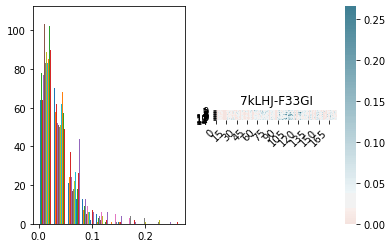

 video_shift 4:34 , chapter 15.7 The Case of Exponential Families 
 video_shift 6:2 , chapter 7.5 Density Functions 
 video_shift 8:42 , chapter 8.5 Summary 
 video_shift 12:36 , chapter 15.5 Comparison of Estimation Procedures 
 video_shift 15:31 , chapter 16.2 The Bootstrap 
 video_shift 18:45 , chapter 16.2 The Bootstrap 
 video_shift 20:58 , chapter 15.7 The Case of Exponential Families 
 video_shift 23:17 , chapter 14.6 A Note on Exponential Families and Efficient Estimators 
 video_shift 24:43 , chapter 15.2 Examples 
 video_shift 30:40 , chapter 15.7 The Case of Exponential Families 
 video_shift 32:38 , chapter 21.2 Contingency tables 
 video_shift 34:12 , chapter 22.5 Kruskal-Wallis Rank-Sum Test 
 video_shift 37:28 , chapter 3.3.2 Multiple Linear Regression 
 video_shift 39:41 , chapter 14.6 A Note on Exponential Families and Efficient Estimators 
 video_shift end , chapter 13.3 Examples 
##############   7snJ1mx1EMQ   #############


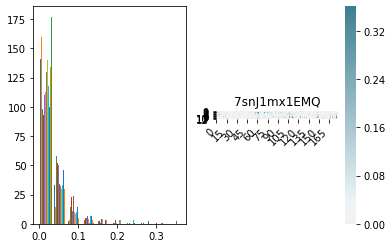

 video_shift 2:48 , chapter 8.10 Answers to Selected Exercises 
 video_shift 4:38 , chapter 8.10 Answers to Selected Exercises 
 video_shift 9:12 , chapter 7.8 Simulating Random Variables 
 video_shift 13:42 , chapter 7.8 Simulating Random Variables 
 video_shift 15:21 , chapter 12.3 Bayesian Statistics 
 video_shift 17:20 , chapter 7.8 Simulating Random Variables 
 video_shift 23:6 , chapter 1.3 Two-way Tables 
 video_shift 25:4 , chapter 15.3 Summary of Estimators 
 video_shift 28:24 , chapter Examples of Mass Functions and Densities 
 video_shift 30:35 , chapter 22.5 Kruskal-Wallis Rank-Sum Test 
 video_shift 31:46 , chapter 22.5 Kruskal-Wallis Rank-Sum Test 
 video_shift 32:31 , chapter 22.5 Kruskal-Wallis Rank-Sum Test 
 video_shift end , chapter 20.6.1 General Guidelines 
##############   RIawrYLVdIw   #############


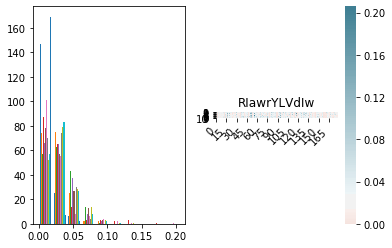

 video_shift 2:24 , chapter 3.3.2 Multiple Linear Regression 
 video_shift 5:51 , chapter 17.6 An Brief Introduction to the Bayesian Approach 
 video_shift 11:44 , chapter 10.3 Importance Sampling 
 video_shift 14:21 , chapter 16.1.1 Means 
 video_shift 18:17 , chapter 9.5 Summary of Properties of Random Variables 
 video_shift 24:4 , chapter 22.5 Kruskal-Wallis Rank-Sum Test 
 video_shift 27:13 , chapter 7.5 Density Functions 
 video_shift 30:52 , chapter 7.2 Distribution Functions 
 video_shift 34:8 , chapter 5.3 Consequences of the Axioms 
 video_shift 48:47 , chapter 12.4 Answers to Selected Exercises 
 video_shift end , chapter 13.2 The Procedure 


In [121]:
chapter_titles = topic_titles
for vid_index,filt_vid in enumerate(filtered_video):
    print('##############   %s   #############' %(filt_vid))

    # let's create a dictionary of the whole of the words in the paper and the video

    # adding the video words
    raw_text_all = []
    for tp_vid in vid_words[vid_index]:
        raw_text_all = raw_text_all + tp_vid

    paper_chapters_one_doc = []
    for index,chapter in enumerate(total_corpus_tokenized):
        x = reduce(lambda x,y: x+y,chapter,[])
        paper_chapters_one_doc.append(x)
        raw_text_all = raw_text_all + x

    # creating dictionary of all of the words in the corpus of the video and the paper
    dictionary = Dictionary([raw_text_all])

    whole_corpus = vid_words[vid_index] + paper_chapters_one_doc

    """maybe think in the future to apply different model 
    rather than tfidf or calculate the document differntly"""
    bgw_corpus = [dictionary.doc2bow(doc) for doc in whole_corpus]
    tf_idf_model = models.TfidfModel(bgw_corpus)
    bgw_chapter = [dictionary.doc2bow(doc) for doc in paper_chapters_one_doc]
    index_sim = similarities.SparseMatrixSimilarity(tf_idf_model[bgw_chapter],
                                                    num_features=len(dictionary))
    bgw_vids = [dictionary.doc2bow(doc) for doc in vid_words[vid_index]]

    correlation = [[s for s in index_sim[tf_idf_model[doc]]] for doc in bgw_vids]
    
    corr_as_row = reduce(lambda x,y: x+y,correlation,[] )
    MyPlotting.similarity_matrix(correlation,min_=min(corr_as_row),
                                 center=statistics.median(corr_as_row),
                                 max_=max(corr_as_row),figure_path='../data/interim',title=filt_vid)
    for i,corr in enumerate(correlation):
        max_cor = max(corr)
        """print ("topic number %s in the video , topic ends at %s ,correlated chapter is %s" 
               %(i+1,vids_shift_times[vid_index][i], chapter_titles[corr.index(max_cor)]))"""
        
        
        shift = vids_shift_times[vid_index][i]
        
        if shift != 'end':
            shift = "%d:%d"%(shift/60,shift%60)
        
        print (" video_shift %s , chapter %s " 
               %(shift, chapter_titles[corr.index(max_cor)]))

In [21]:
def find_top_words_of_topic(topic_words):
    for tp_i,tp_words in enumerate(topic_words):
        print('Finding top words for topic %s' %(tp_i))
        raw_text = ' '.join(tp_words)
        myvectorizer = CountVectorizer()
        mytf = myvectorizer.fit_transform([raw_text]).toarray()
        #print(mytf)
        maxes = heapq.nlargest(4,mytf[0])
        indexes = []
        for i,bal in enumerate(mytf[0]):
            if bal in maxes:
                indexes.append(i)
        [ print(myvectorizer.get_feature_names()[_]) for i,_ in enumerate(indexes)]


In [24]:
# finding the mle chapter 
mle_chapter_start_index = topic_titles.index('Maximum Likelihood Estimation')
mle_chapter_end_index = topic_titles.index('Interval Estimation')
print(mle_chapter_start_index)
print(mle_chapter_end_index)

106
116


In [26]:
topic_titles[mle_chapter_start_index:mle_chapter_end_index]

['Maximum Likelihood Estimation',
 '15.2 Examples',
 '15.3 Summary of Estimators',
 '15.4 Asymptotic Properties',
 '15.5 Comparison of Estimation Procedures',
 '15.6 Multidimensional Estimation',
 '15.7 The Case of Exponential Families',
 '15.8 Choice of Estimators',
 '15.9 Technical Aspects',
 '15.10 Answers to Selected Exercises']

In [28]:
total_corpus_tokenized[107]

[['straightforward', 'state'],
 ['begin',
  'observation',
  'principle',
  'maximum',
  'likelihood',
  'yield',
  'choice',
  'estimator',
  'make',
  'observed',
  'datum',
  'probable'],
 ['density',
  'function',
  'regard',
  'function',
  'presume',
  'unique',
  'global',
  'maximum',
  'exist'],
 ['learn',
  'large',
  'sample',
  'maximum',
  'likelihood',
  'estimator',
  'many',
  'desirable',
  'property'],
 ['high', 'dimensional', 'datum', 'likelihood', 'many', 'local'],
 ['find', 'global', 'maximum', 'major', 'computational', 'challenge'],
 ['independent',
  'observation',
  'likelihood',
  'product',
  'density',
  'function'],
 ['sum', 'function', 'likelihood', 'easy'],
 ['parameter',
  'value',
  'variable',
  'interest',
  'unusual',
  'next',
  'look',
  'several',
  'example',
  'likelihood',
  'function'],
 ['introduction',
  'science',
  'statistic',
  'figure',
  'function',
  'top',
  'row',
  'bottom',
  'row',
  'trial'],
 ['left', 'column', 'base', 'trial', 

In [32]:
total_corpus[107]

'The solution of the problems of calculating from a sample the parameters of the hypothetical popula- tion, which we have put forward in the method of maximum likelihood, consists, then, simply of choosing such values of these parameters as have the maximum likelihood. - R. A. Fisher, Phil. Trans. Royal Soc. Ser. A. 222, (1922), The principle of maximum likelihood is relatively straightforward to state. As before, we begin with observations Then, the principle of maximum likelihood yields a choice of the estimator  makes the observed data most probable. Definition 15.1. The likelihood function is the density function regarded as a function of  . Thus, we are presuming that a unique global maximum exists. We will learn that especially for large samples, the maximum likelihood estimators have many desirable properties. However, especially for high dimensional data, the likelihood can have many local maxima. Thus, finding the global maximum can be a major computational challenge. For inde